<span style="color:red; font-size: 40px; font-weight: bold;">             used car price predection              </span>

<span style="color:green; font-size: 30px; font-weight: bold;">            reading data                 </span>


In [1338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from scipy.stats import pointbiserialr
from dython.nominal import associations
import datetime


In [1339]:
# Let's first load the dataset to inspect its structure
import pandas as pd

# Load the dataset
file_path = "train and test datasets/train.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


(None,
    id          brand              model  model_year  milage      fuel_type  \
 0   0           MINI      Cooper S Base        2007  213000       Gasoline   
 1   1        Lincoln              LS V8        2002  143250       Gasoline   
 2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
 3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
 4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
 
                                               engine  \
 0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
 1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
 2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
 3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
 4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
 
                      transmission ext_col int_col  \
 0                             A/T  Yellow    Gray   
 1                             A/T  Silver   Beige   
 2         

In [1343]:
import pandas as pd

# Get DataFrame summary information
df_info = pd.DataFrame({
    'Non-null Count': df.notnull().sum(),
    'Data Type': df.dtypes
})

# Identify object (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Function to highlight 'object' data types
def highlight_object_columns(row):
    return ['background-color: lightyellow' if row['Data Type'] == 'object' else '' for _ in row]

# Create a styled table
styled_table = df_info.style.set_table_attributes('style="font-size: 16px; border-collapse: collapse; width: 100%;"') \
                           .set_caption("DataFrame Information Summary") \
                           .background_gradient(cmap='coolwarm', subset=['Non-null Count']) \
                           .highlight_max(subset=['Non-null Count'], color='lightgreen') \
                           .highlight_min(subset=['Non-null Count'], color='lightcoral') \
                           .apply(highlight_object_columns, axis=1) \
                           .set_properties(**{'border': '1px solid black', 'color': 'black'})

# Display the styled table
styled_table


,Non-null Count,Data Type
id,188533,int64
brand,188533,object
model,188533,object
model_year,188533,int64
milage,188533,int64
fuel_type,183450,object
engine,188533,object
transmission,188533,object
ext_col,188533,object
int_col,188533,object


# our coulmns are in train data:
* id
* brand
* model
* model_year
* milage
* fuel_type
* engine
* transmission
* ext_col
* int_col
* accident
* clean_title
* price

In [1269]:
df.shape

(188533, 13)

In [1270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [1271]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [1272]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# Visualizing missing data


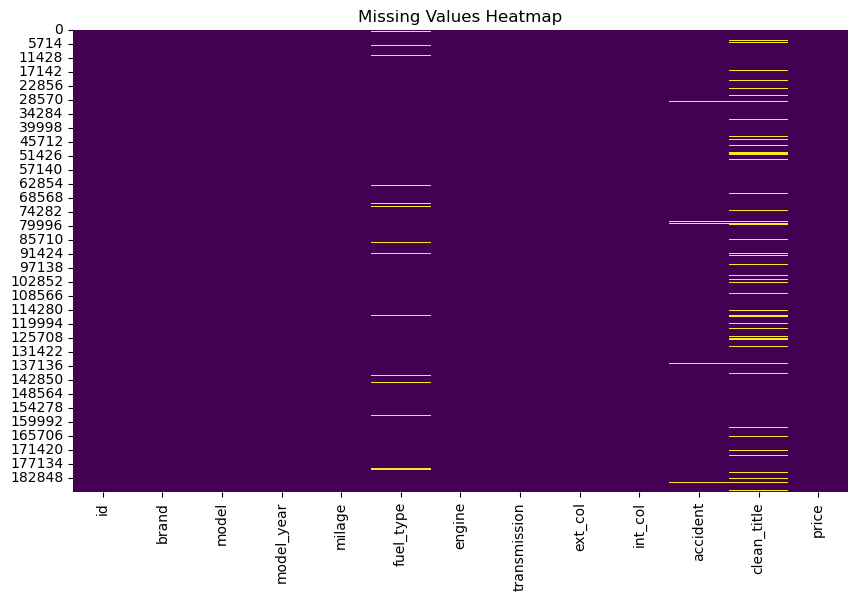

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [1273]:
# Visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check missing values count
missing_values = df.isnull().sum()
missing_values

In [1344]:
df["transmission"].nunique()

52

#### we realize that we have nulls in :
* fuel_type
* accident
* clean_title

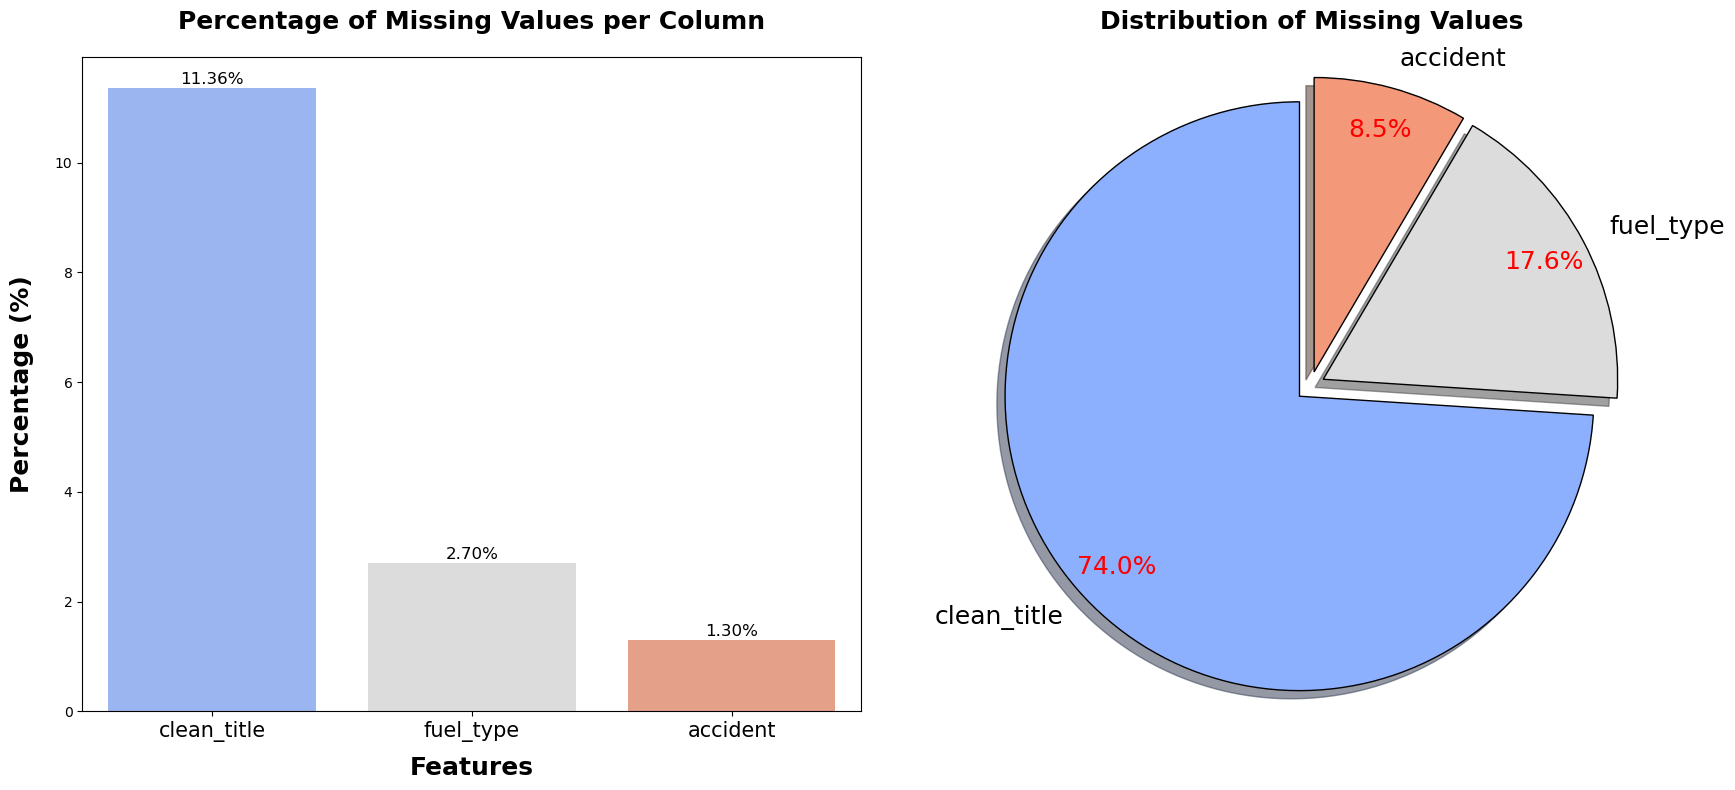

In [1274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate missing values percentage
missing_values = df.isnull().sum() / df.shape[0] * 100

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Check if there are missing values to plot
if not missing_values.empty:
    # Sort missing values in descending order for better visualization
    missing_values = missing_values.sort_values(ascending=False)

    # Create a figure with two subplots: one for the bar plot and one for the pie chart
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Bar plot
    colors = sns.color_palette("coolwarm", len(missing_values))  # Better color palette
    sns.barplot(x=missing_values.index, y=missing_values.values, palette=colors, ax=axes[0])

    # Customize bar plot
    axes[0].set_title('Percentage of Missing Values per Column', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
    axes[0].set_xlabel('Features', fontsize=18, weight='bold', labelpad=10)  # Gap added with `labelpad`
    axes[0].set_ylabel('Percentage (%)', fontsize=18, weight='bold', labelpad=15)  # Increase y-axis label distance with `labelpad`

    # Set larger font size for x-axis labels (column names)
    axes[0].tick_params(axis='x', rotation=0, labelsize=15)
    
    # Add annotations on top of bars
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].annotate(f'{height:.2f}%', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', 
                         fontsize=12, color='black', xytext=(0, 3), 
                         textcoords='offset points')

    # Pie chart with larger font sizes for labels and percentages
    explode = [0.05] * len(missing_values)  # Slight explosion for all slices to enhance the pie chart look
    wedges, texts, autotexts = axes[1].pie(
        missing_values.values, 
        labels=missing_values.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'}, 
        textprops={'fontsize': 18},  # Increase font size for labels
        pctdistance=0.85,  # Position percentage closer to the center
        explode=explode,  # Add slight explosion for emphasis
        shadow=True  # Add shadow for a 3D effect
    )

    # Increase font size of percentage labels inside the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(18)  # Adjust this value for percentage font size
        autotext.set_color('red')  # Set color to white for better contrast

    # Customize the pie chart title
    axes[1].set_title('Distribution of Missing Values', fontsize=18, weight='bold', pad=20)  # Add padding to title

    # Equal aspect ratio ensures that the pie chart is a circle
    axes[1].axis('equal')

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plot
    plt.show()

else:
    print("No missing values to plot.")


# fuel_type

In [1275]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

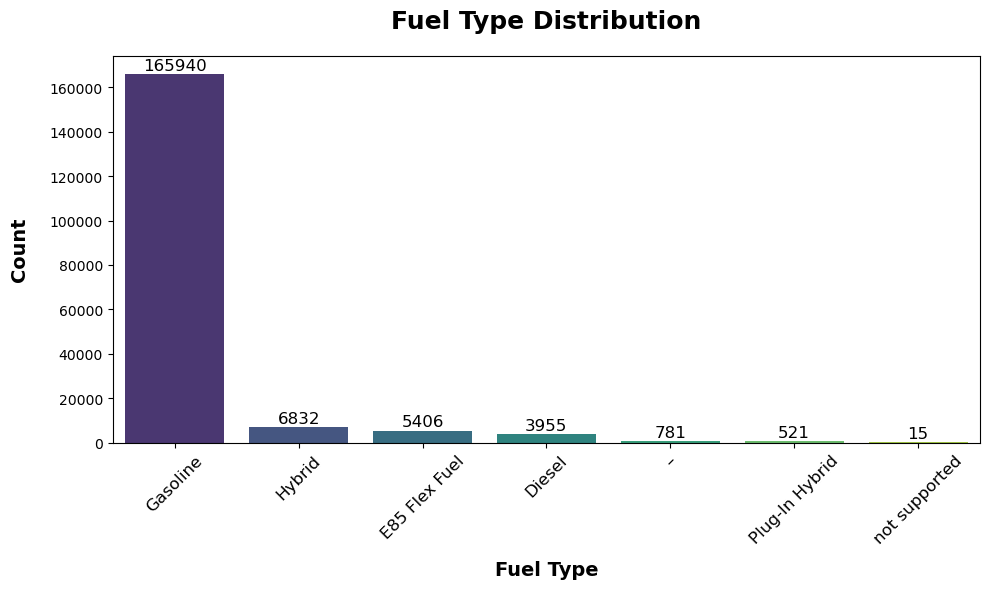

In [1276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["fuel_type"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('Fuel Type Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('Fuel Type', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


In [1277]:
# Function to extract fuel type from the engine column, keeping the original fuel_type if no match is found
def extract_fuel_from_engine(engine, original_fuel_type):
    if pd.isna(engine):
        return original_fuel_type  # Keep the original fuel type if engine info is missing
    engine_lower = engine.lower()
    
    # Check for fuel types
    if "electric" in engine_lower:
        return "Electric"
    elif "gasoline" in engine_lower or "gas" in engine_lower:
        return "Gasoline"
    elif "diesel" in engine_lower:
        return "Diesel"
    elif "flex fuel" in engine_lower:
        return "Flex Fuel"
    elif "hybrid" in engine_lower:
        return "Hybrid"
    else:
        return original_fuel_type  # Keep the original fuel type if no match is found

# Apply the function and pass the original fuel_type as a fallback
df['fuel_type'] = df.apply(lambda row: extract_fuel_from_engine(row['engine'], row['fuel_type']), axis=1)


In [1278]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          164875
Electric           11139
Flex Fuel           5168
Diesel              4189
Hybrid              1931
–                    774
E85 Flex Fuel        267
Plug-In Hybrid        13
Name: count, dtype: int64

In [1279]:
# Step 2: Merge 'E85 Flex Fuel' with 'Flex Fuel'
df['fuel_type'] = df['fuel_type'].replace('E85 Flex Fuel', 'Flex Fuel')

# Step 3: Merge 'Plug-In Hybrid' with 'Hybrid'
df['fuel_type'] = df['fuel_type'].replace('Plug-In Hybrid', 'Hybrid')

# Check the updated unique values in fuel_type
df['fuel_type'].value_counts()


fuel_type
Gasoline     164875
Electric      11139
Flex Fuel      5435
Diesel         4189
Hybrid         1944
–               774
Name: count, dtype: int64

In [1280]:
# Drop rows where the fuel_type column has the value '–'
df = df[df['fuel_type'] != '–']

# Check the updated dataframe to confirm the rows have been dropped
df['fuel_type'].value_counts()

fuel_type
Gasoline     164875
Electric      11139
Flex Fuel      5435
Diesel         4189
Hybrid         1944
Name: count, dtype: int64

In [1281]:
df['fuel_type'].isna().sum()

177

In [1282]:
df = df.dropna(subset=['fuel_type'])
df['fuel_type'].isna().sum()

0

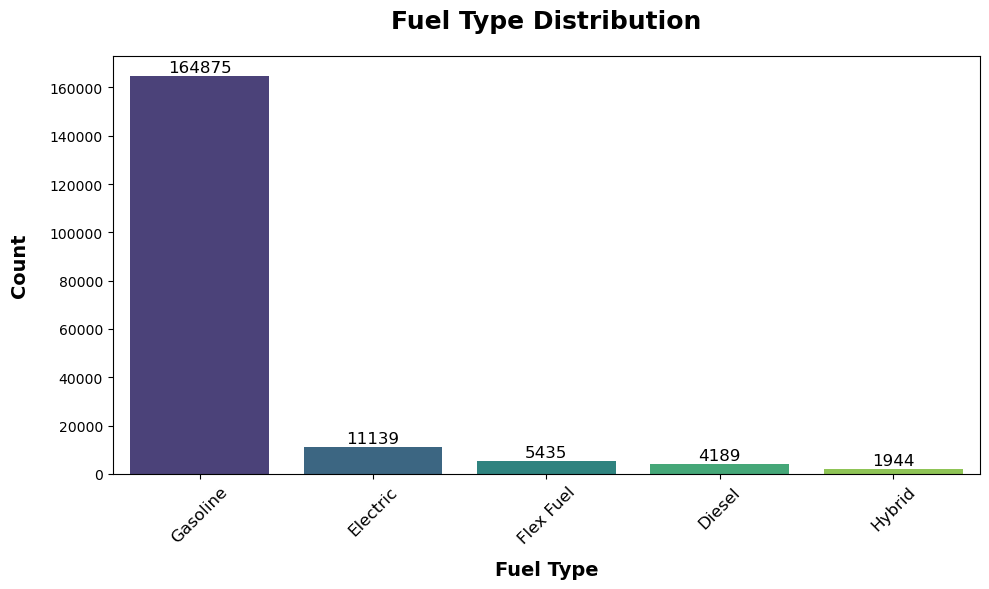

In [1283]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["fuel_type"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('Fuel Type Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('Fuel Type', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


# accident

In [1284]:
df['accident'].value_counts()

accident
None reported                             143867
At least 1 accident or damage reported     41286
Name: count, dtype: int64

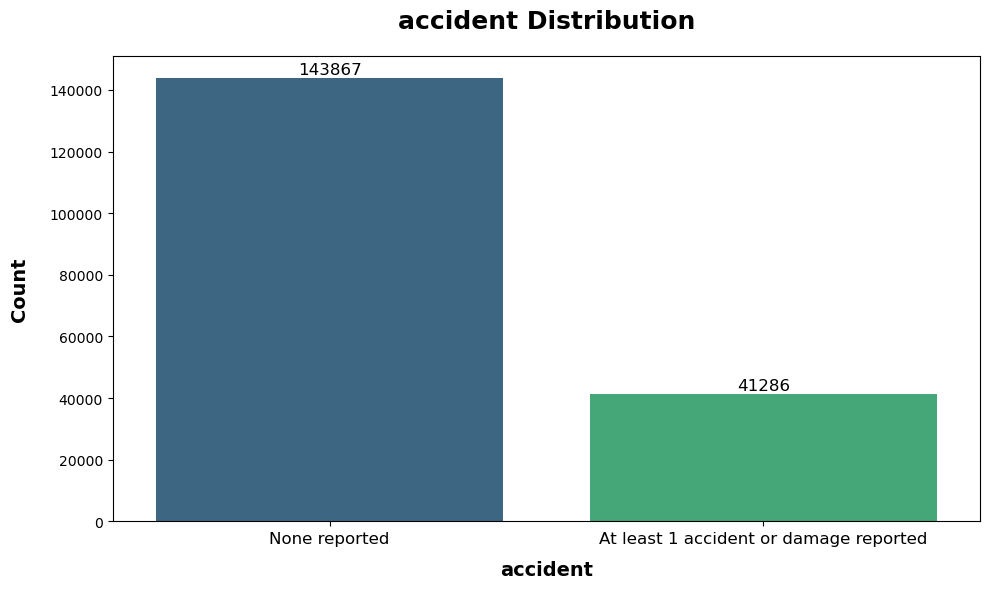

In [1285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["accident"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('accident Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('accident', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


In [1286]:
df['accident'].isna().sum()

2429

In [1287]:
df = df.dropna(subset=['accident'])

In [1288]:
df['accident'].isna().sum()

0

# clean_title

In [1289]:
 df['clean_title'].value_counts()

clean_title
Yes    166331
Name: count, dtype: int64

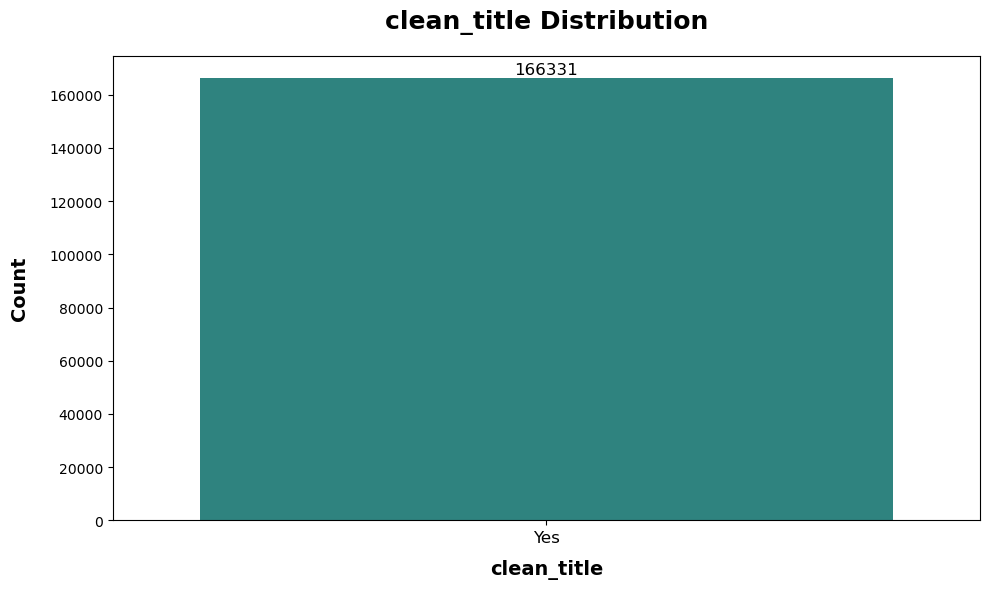

In [1290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["clean_title"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('clean_title Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('clean_title', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


In [1291]:
df['clean_title'].isna().sum()

18822

In [1292]:
df['clean_title'] = df['clean_title'].fillna('NO')

In [1293]:
 df['clean_title'].value_counts()

clean_title
Yes    166331
NO      18822
Name: count, dtype: int64

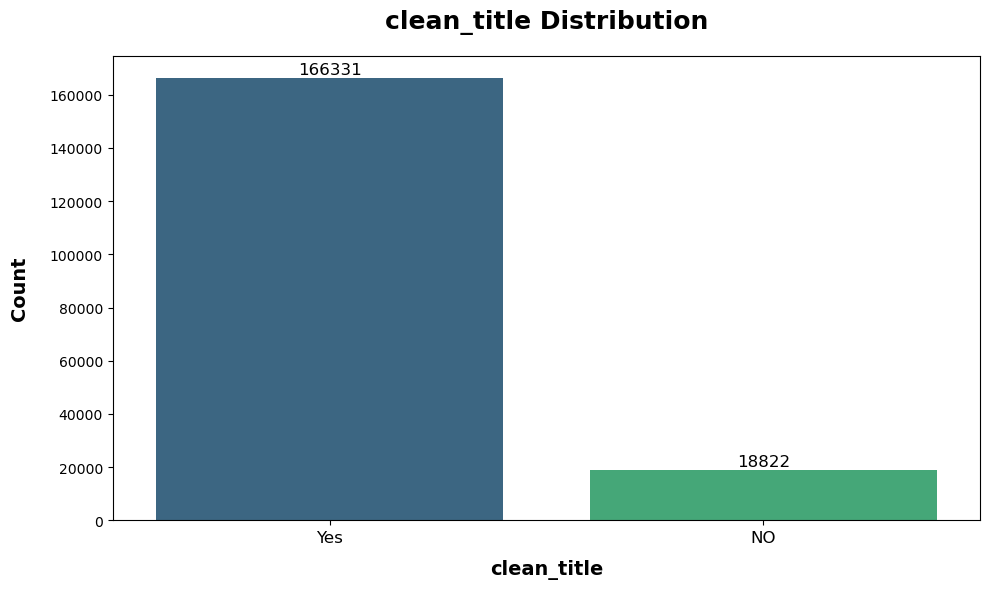

In [1294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["clean_title"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('clean_title Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('clean_title', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


# color 

In [1295]:
df["ext_col"].unique()


array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Phytonic Blue Metallic', 'Blu', 'Orange',
       'Brown', 'Brilliant Silver Metallic', 'Black Raven',
       'Black Clearcoat', 'Firenze Red', 'Agate Black Metallic',
       'Glacial White Pearl', 'Majestic Plum Metallic',
       'designo Diamond White Metallic', 'Oxford White',
       'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red Clearcoat',
       'Lunar Bl

In [1296]:
df["int_col"].nunique()

156

In [1297]:
!pip install wordcloud

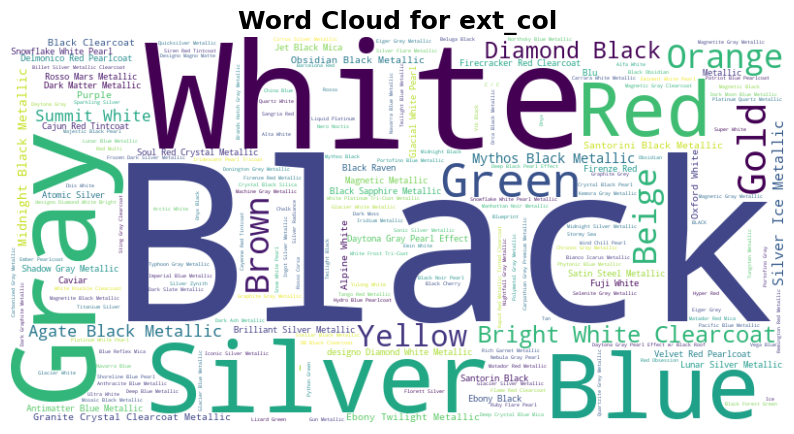

In [1298]:
from wordcloud import WordCloud

# Generate the word cloud from the ext_col values
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(df['ext_col'].value_counts())

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for ext_col', fontsize=18, weight='bold')
plt.show()


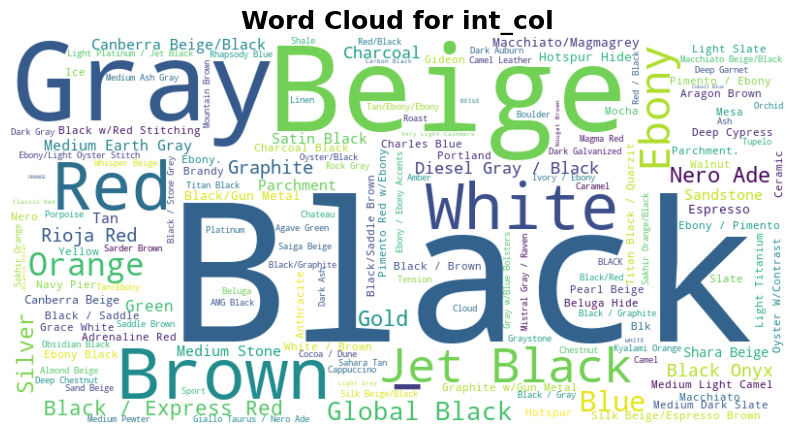

In [1299]:
from wordcloud import WordCloud

# Generate the word cloud from the ext_col values
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(df['int_col'].value_counts())

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for int_col', fontsize=18, weight='bold')
plt.show()

In [1300]:
# Define a function to simplify and group colors into broader categories for ML models
def reduce_color_variants(color):
    color = color.lower().strip()  # Make sure everything is lowercase and stripped of spaces
    
    # Mapping broader color categories
    if any(x in color for x in ['red', 'rosso', 'ruby', 'crimson', 'scarlet']):
        return 'red'
    elif any(x in color for x in ['blue', 'navy', 'indigo']):
        return 'blue'
    elif any(x in color for x in ['black', 'nero', 'onyx']):
        return 'black'
    elif any(x in color for x in ['white', 'bianco', 'alpine', 'snow', 'frost']):
        return 'white'
    elif any(x in color for x in ['silver', 'gray', 'grey', 'granite', 'titanium']):
        return 'gray'
    elif any(x in color for x in ['green', 'emerald']):
        return 'green'
    elif any(x in color for x in ['yellow']):
        return 'yellow'
    elif any(x in color for x in ['brown', 'bronze', 'beige', 'tan']):
        return 'brown'
    elif any(x in color for x in ['purple', 'plum']):
        return 'purple'
    elif any(x in color for x in ['orange']):
        return 'orange'
    elif any(x in color for x in ['gold']):
        return 'gold'
    elif any(x in color for x in ['pink']):
        return 'pink'
    else:
        return 'other'  # Handle remaining rare or unspecified colors

# Apply the function to reduce color variants
df['ext_col'] = df['ext_col'].apply(reduce_color_variants)
df['int_col'] = df['int_col'].apply(reduce_color_variants)
# Check unique values after reduction
df['ext_col'].unique()


array(['yellow', 'gray', 'blue', 'black', 'white', 'green', 'purple',
       'other', 'red', 'brown', 'gold', 'orange', 'pink'], dtype=object)

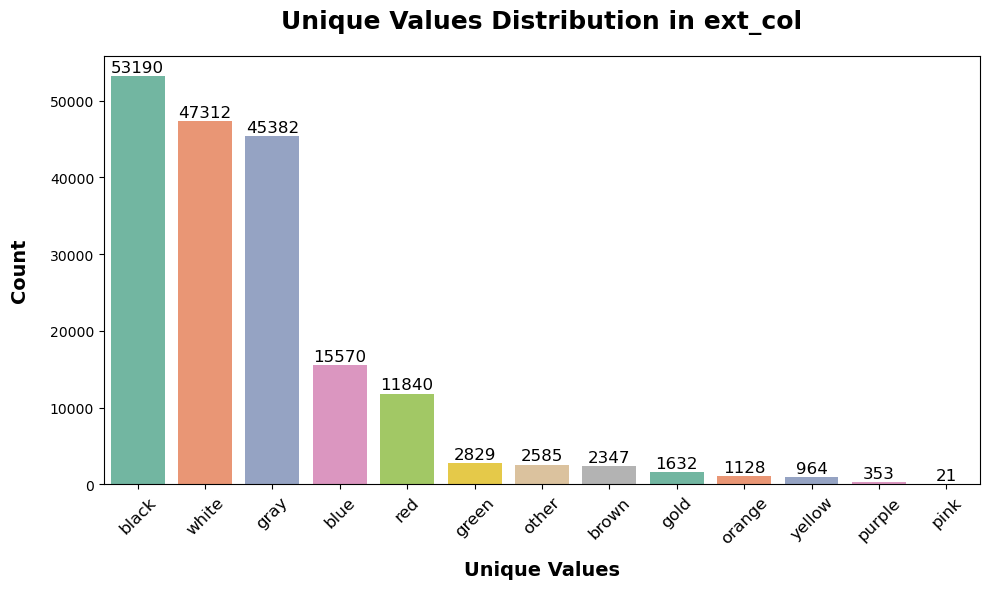

In [1301]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in 'ext_col'
unique_values = df["ext_col"].value_counts()

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Bar plot for unique values in 'ext_col'
sns.barplot(x=unique_values.index, y=unique_values.values, palette="Set2")

# Customize the bar plot
plt.title('Unique Values Distribution in ext_col', fontsize=18, weight='bold', pad=20)
plt.xlabel('Unique Values', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels if needed

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


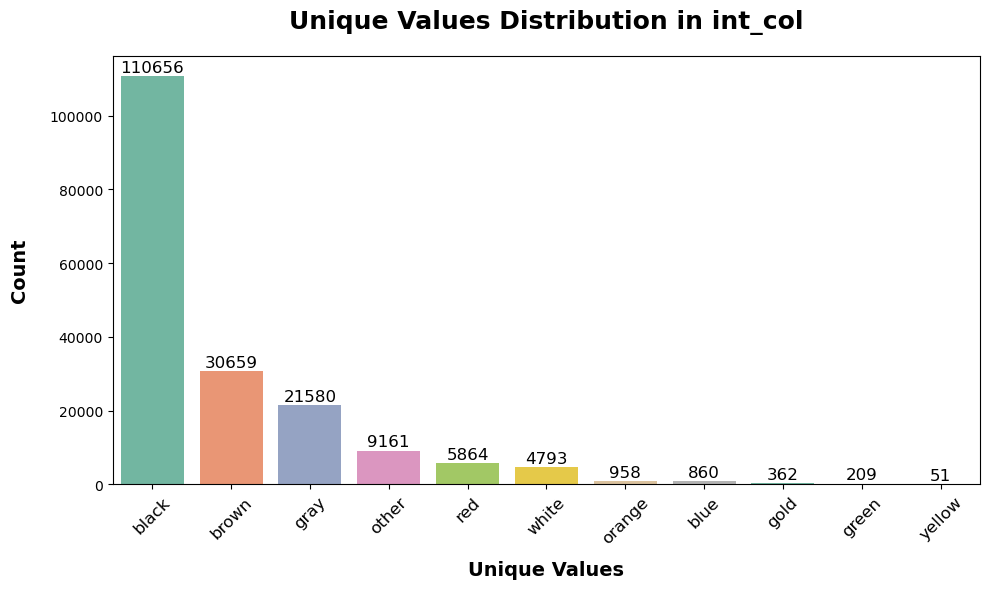

In [1302]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique values in 'ext_col'
unique_values = df["int_col"].value_counts()

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Bar plot for unique values in 'ext_col'
sns.barplot(x=unique_values.index, y=unique_values.values, palette="Set2")

# Customize the bar plot
plt.title('Unique Values Distribution in int_col', fontsize=18, weight='bold', pad=20)
plt.xlabel('Unique Values', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels if needed

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


# enigine coulmn

In [1303]:
# Extract horsepower, engine size (liters), and number of cylinders from the engine column
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP')[0].astype(float)
df['engine_size'] = df['engine'].str.extract(r'(\d+\.?\d*)L')[0].astype(float)
df['cylinders'] = df['engine'].str.extract(r'(\d+) Cylinder')[0].astype(float)

# Drop the original 'engine' column if all useful data has been extracted
df.drop(columns=['engine'], inplace=True)

# Check for missing values in the new features and handle them
df[['horsepower', 'engine_size', 'cylinders']].isnull().sum()

horsepower     31500
engine_size    13175
cylinders      36049
dtype: int64

In [1304]:
# Imputing horsepower and engine_size based on median values within each model
# For horsepower
df['horsepower'] = df.groupby('model')['horsepower'].transform(lambda x: x.fillna(x.mean()))
df['horsepower'] = df.groupby('brand')['horsepower'].transform(lambda x: x.fillna(x.mean()))
df['horsepower'].isnull().sum()

7

In [1305]:
df = df.dropna(subset=['horsepower'])

In [1306]:
df['horsepower'].isnull().sum()

0

In [1307]:
# Fill cylinders based on the mean of each model
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mean()))
df['cylinders'] = df.groupby('brand')['cylinders'].transform(lambda x: x.fillna(x.mean()))

# Check if there are any remaining null values
print(df['cylinders'].isnull().sum())

0


In [1308]:
# Fill engine_size based on the mean of each model
df['engine_size'] = df.groupby('model')['engine_size'].transform(lambda x: x.fillna(x.mean()))
df['engine_size'] = df.groupby('brand')['engine_size'].transform(lambda x: x.fillna(x.mean()))



# Check if there are any remaining null values
print(df['engine_size'].isnull().sum())


0


In [1309]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
horsepower      0
engine_size     0
cylinders       0
dtype: int64

## feature enginerring

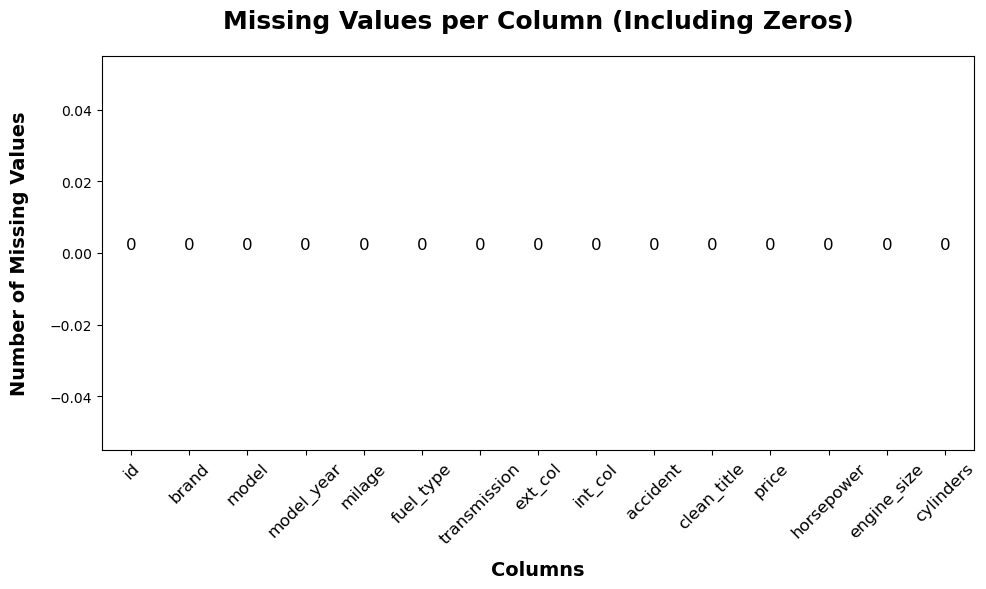

In [1312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values for each column
missing_values = df.isna().sum()

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Bar plot of missing values (including columns with 0 missing values)
sns.barplot(x=missing_values.index, y=missing_values.values, palette="Blues_r")

# Customize the plot
plt.title('Missing Values per Column (Including Zeros)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Columns', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Number of Missing Values', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)

# Add annotations on top of bars for clarity, even if 0
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


# age of the car

In [1328]:
# Get the current year
current_year = datetime.datetime.now().year

# Convert 'model_year' to 'age'
df['car_age'] = current_year - df['model_year']

# Check the result
df[['model_year', 'car_age']].head()

,model_year,car_age
0,2007,17
1,2002,22
2,2002,22
3,2017,7
4,2021,3


In [1329]:
df = df.drop(columns=['model_year'])

In [1100]:
df.head()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,car_age
0,0,MINI,Cooper S Base,213000,Gasoline,A/T,yellow,gray,None reported,Yes,4200,172.0,1.6,4.0,17
1,1,Lincoln,LS V8,143250,Gasoline,A/T,gray,brown,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,22
2,2,Chevrolet,Silverado 2500 LT,136731,Flex Fuel,A/T,blue,gray,None reported,Yes,13900,320.0,5.3,8.0,22
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,black,black,None reported,Yes,45000,420.0,5.0,8.0,7
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,7-Speed A/T,black,brown,None reported,Yes,97500,208.0,2.0,4.0,3


## transmission coulmn 


In [1313]:
# Get unique values in the 'transmission' column
print(df['transmission'].unique())

['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic' '1-Speed A/T' '6-Speed A/T' '10-Speed A/T'
 '9-Speed A/T' '8-Speed Automatic' '9-Speed Automatic' '5-Speed A/T'
 '7-Speed Automatic with Auto-Shift' 'Automatic' 'CVT Transmission'
 '5-Speed M/T' 'M/T' '6-Speed M/T' '6-Speed Automatic' '4-Speed Automatic'
 '7-Speed M/T' '2-Speed A/T' '1-Speed Automatic' 'Automatic CVT'
 '4-Speed A/T' '6-Speed Manual' 'Transmission Overdrive Switch'
 '8-Speed Automatic with Auto-Shift' '7-Speed Manual' '7-Speed Automatic'
 '9-Speed Automatic with Auto-Shift' '6-Speed Automatic with Auto-Shift'
 '6-Speed Electronically Controlled Automatic with O' 'F' 'CVT-F'
 '8-Speed Manual' 'Manual' '–' '2' '6 Speed At/Mt' '5-Speed Automatic'
 '2-Speed Automatic' '8-SPEED A/T' '7-Speed' 'Variable'
 'Single-Speed Fixed Gear' '8-SPEED AT'
 '10-Speed Automatic with Overdrive' '7-Speed DCT Automatic'
 'SCHEDULED FOR OR IN PRODUCTION' '6-Speed' '6 Speed Mt']


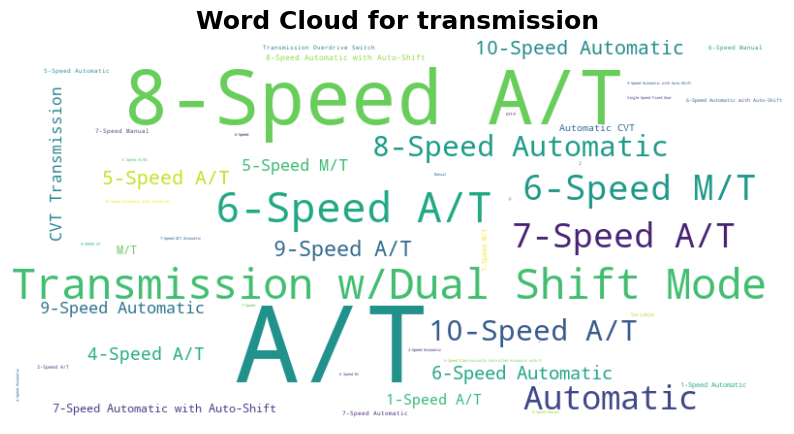

In [1315]:
from wordcloud import WordCloud

# Generate the word cloud from the ext_col values
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(df['transmission'].value_counts())

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for transmission', fontsize=18, weight='bold')
plt.show()


In [1316]:
def categorize_transmission(transmission):
    if pd.isna(transmission) or transmission.strip() == "":  # Handle empty or NaN values
        return 'Other'
    
    transmission = transmission.lower().strip()  # Convert to lowercase and remove leading/trailing spaces
    
    # Patterns for each category with broader matching
    if re.search(r'(automatic|a/t|auto|overdrive|speed a/t|speed automatic)', transmission):
        return 'Automatic'
    elif re.search(r'(manual|m/t|mt|speed manual)', transmission):
        return 'Manual'
    elif re.search(r'(cvt|variable)', transmission):
        return 'CVT'
    elif re.search(r'(dual-clutch|dct)', transmission):
        return 'Dual-Clutch'
    else:
        return 'Other'  # Return 'Other' if no pattern matches

# Apply the function to the 'Transmission' column
df['Transmission_Standardized'] = df['transmission'].apply(categorize_transmission)

# Check for any null values
null_count = df['Transmission_Standardized'].isna().sum()
other_count = df['Transmission_Standardized'].value_counts().get('Other', 0)

# Display the DataFrame and counts
#import ace_tools as tools; tools.display_dataframe_to_user(name="Standardized Transmission Data (Regex - Expanded)", dataframe=df)
print(f"Number of 'Other' values: {other_count}")

Number of 'Other' values: 19347


In [1317]:
df['Transmission_Standardized'].value_counts()

Transmission_Standardized
Automatic    147744
Other         19347
Manual        16009
CVT            2046
Name: count, dtype: int64

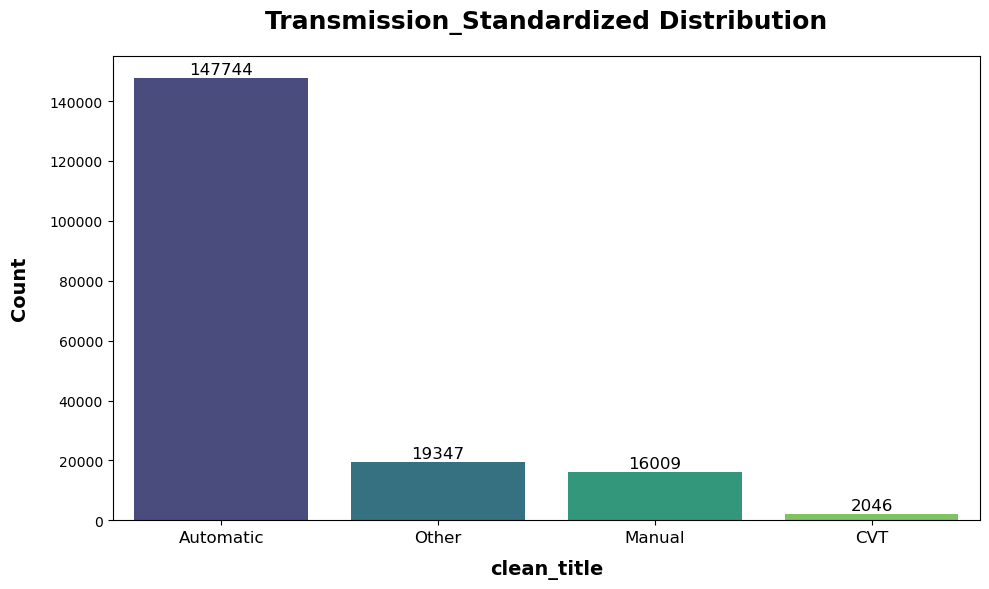

In [1318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'fuel_type' column
fuel_type_counts = df["Transmission_Standardized"].value_counts()

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette="viridis")

# Customize the bar plot
plt.title('Transmission_Standardized Distribution', fontsize=18, weight='bold', pad=20)  # Gap added with `pad`
plt.xlabel('clean_title', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=0, fontsize=12)  # Rotate x labels for readability

# Add annotations on top of bars for clarity
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='baseline', 
                       fontsize=12, color='black', xytext=(0, 3), 
                       textcoords='offset points')

# Adjust layout to ensure the plot is properly spaced
plt.tight_layout()

# Display the plot
plt.show()


In [1319]:
df['Transmission_Standardized'].isna().sum()

0

In [1320]:
df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,Transmission_Standardized
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,yellow,gray,None reported,Yes,4200,172.0,1.6,4.0,Automatic
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,gray,brown,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,Automatic
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Flex Fuel,A/T,blue,gray,None reported,Yes,13900,320.0,5.3,8.0,Automatic
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,black,black,None reported,Yes,45000,420.0,5.0,8.0,Other
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,black,brown,None reported,Yes,97500,208.0,2.0,4.0,Automatic


In [1321]:
#df=df.drop(["ext_col","int_col"],axis=1)
#transmission
df=df.drop("transmission",axis=1)

In [1322]:
df.head()

,id,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,Transmission_Standardized
0,0,MINI,Cooper S Base,2007,213000,Gasoline,yellow,gray,None reported,Yes,4200,172.0,1.6,4.0,Automatic
1,1,Lincoln,LS V8,2002,143250,Gasoline,gray,brown,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,Automatic
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Flex Fuel,blue,gray,None reported,Yes,13900,320.0,5.3,8.0,Automatic
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,black,black,None reported,Yes,45000,420.0,5.0,8.0,Other
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,black,brown,None reported,Yes,97500,208.0,2.0,4.0,Automatic


In [1108]:

df.to_csv('cleaned_dataset.csv', index=False)


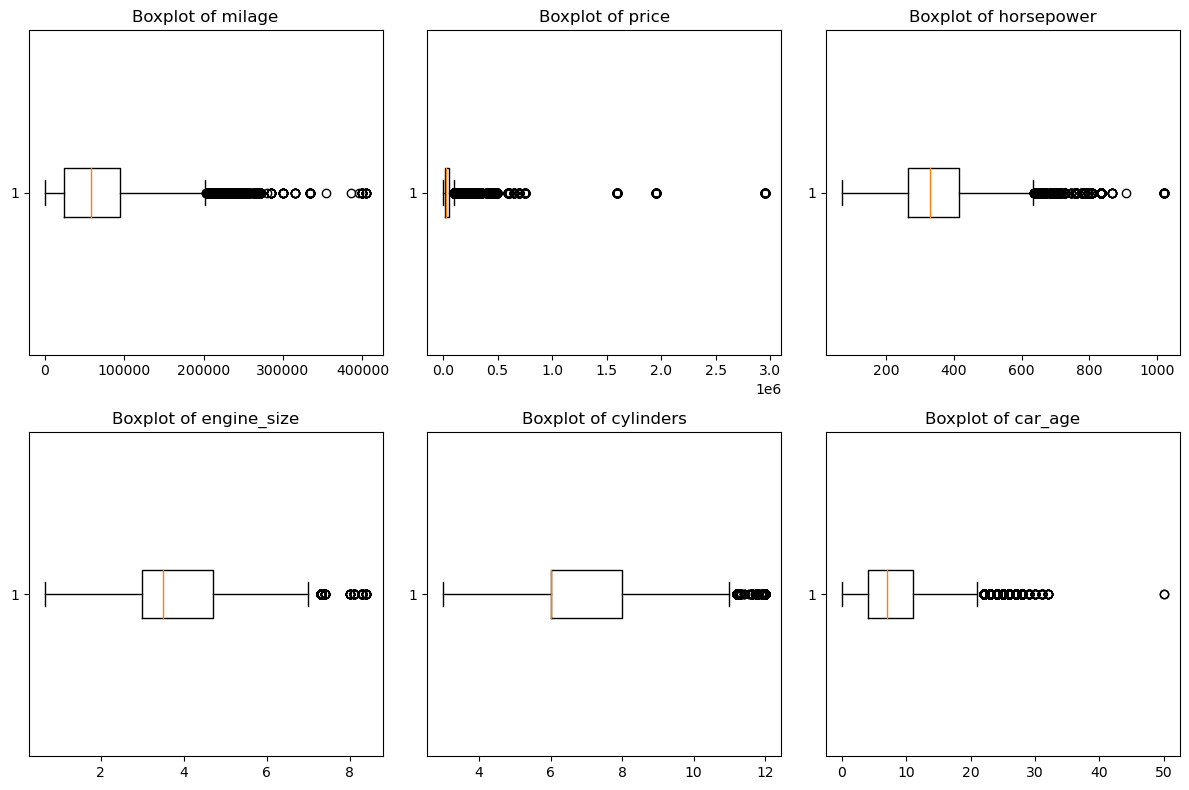

In [1109]:
import matplotlib.pyplot as plt

# Select numeric columns for outlier detection
numeric_columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

# Create boxplots for these numeric columns to visualize outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [1330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185146 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         185146 non-null  int64  
 1   brand                      185146 non-null  object 
 2   model                      185146 non-null  object 
 3   milage                     185146 non-null  int64  
 4   fuel_type                  185146 non-null  object 
 5   ext_col                    185146 non-null  object 
 6   int_col                    185146 non-null  object 
 7   accident                   185146 non-null  object 
 8   clean_title                185146 non-null  object 
 9   price                      185146 non-null  int64  
 10  horsepower                 185146 non-null  float64
 11  engine_size                185146 non-null  float64
 12  cylinders                  185146 non-null  float64
 13  Transmission_Standardized  185146 

# remove outliers

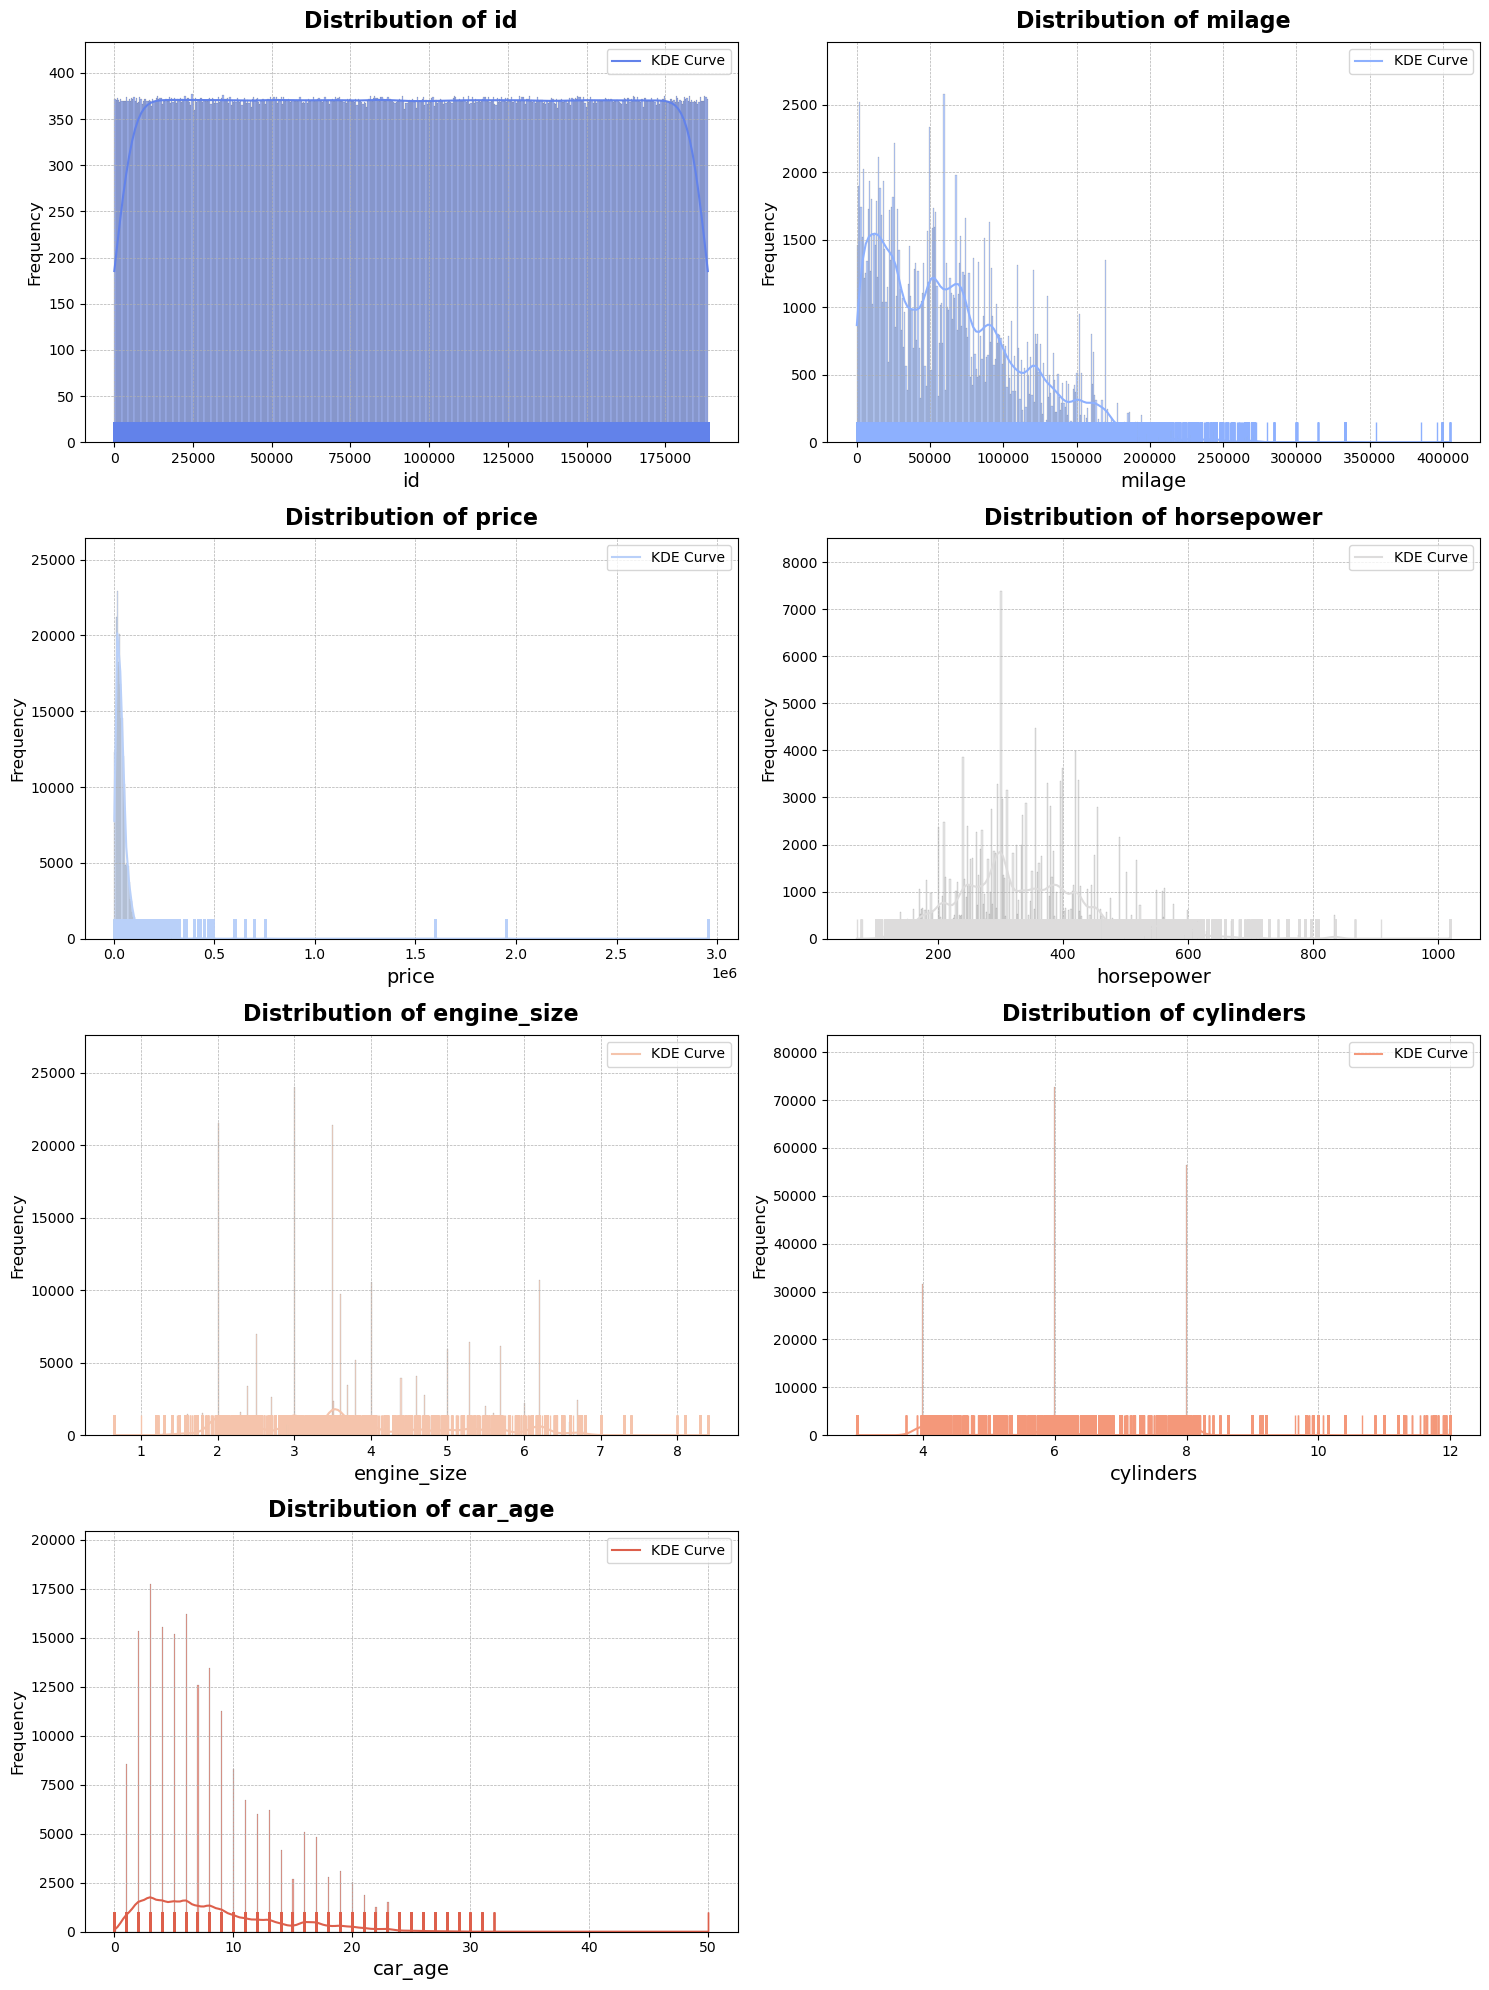

In [1332]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the grid size (2 histograms per row)
n_cols = 2
n_rows = (len(numerical_columns.columns) + 1) // n_cols

# Set the figure size
plt.figure(figsize=(15, n_rows * 5))

# Custom color palette
colors = sns.color_palette("coolwarm", len(numerical_columns.columns))

# Loop through each numerical column and create a customized histogram
for i, (column, color) in enumerate(zip(numerical_columns.columns, colors), 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create a histogram with KDE, transparency, and rug plot
    sns.histplot(df[column], kde=True, bins=500, color=color, alpha=0.6, edgecolor='black')
    sns.rugplot(x=df[column], color=color, height=0.05)  # Add rug plot to show data points
    
    # Adding title and labels
    plt.title(f'Distribution of {column}', fontsize=16, weight='bold', pad=10)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add gridlines for better visualization
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add legend for KDE curve
    plt.legend(["KDE Curve"])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


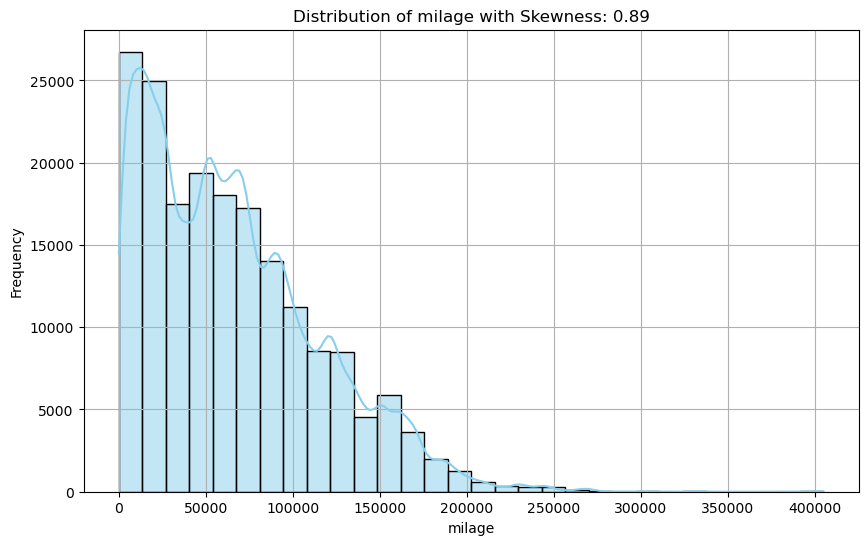

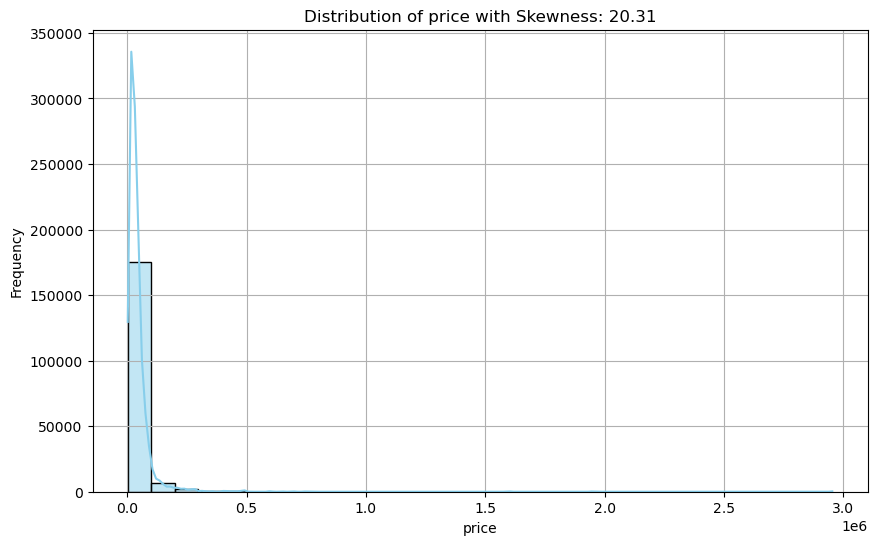

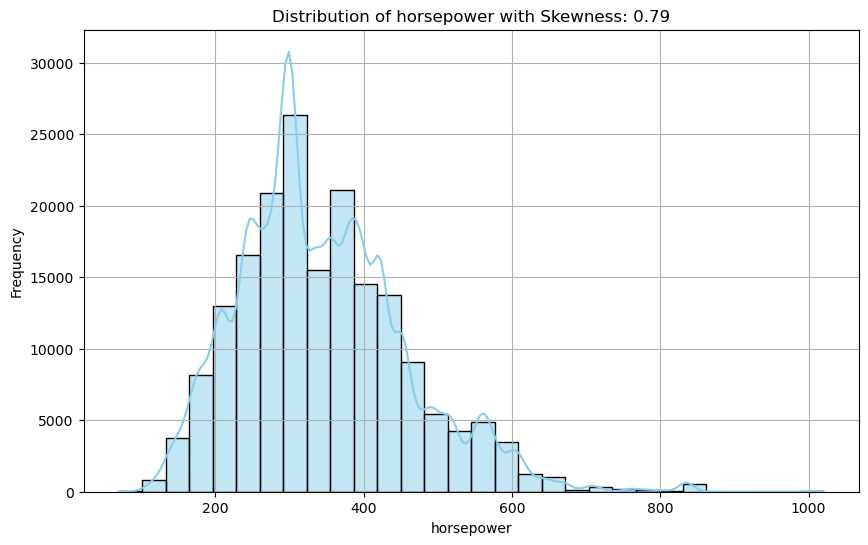

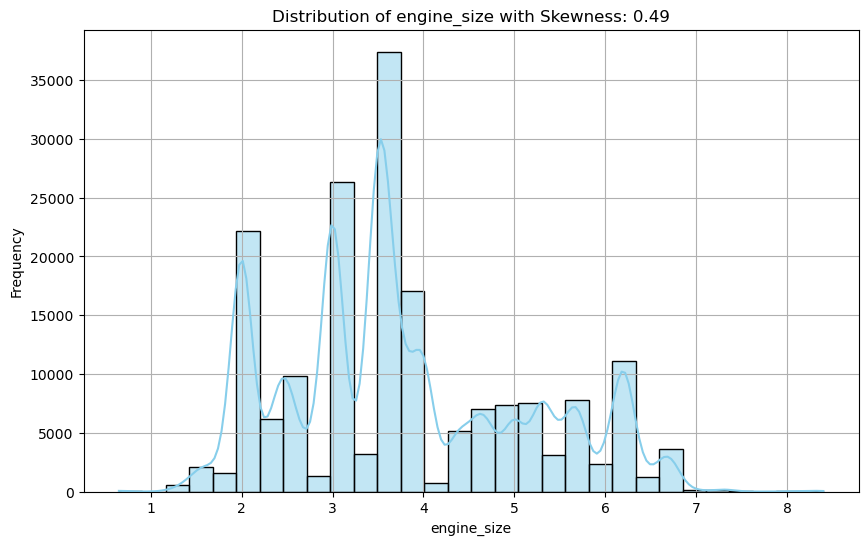

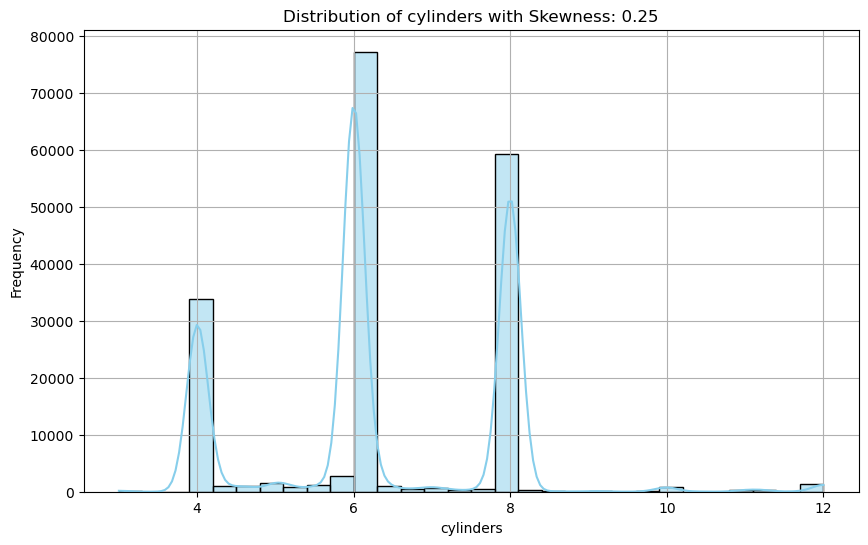

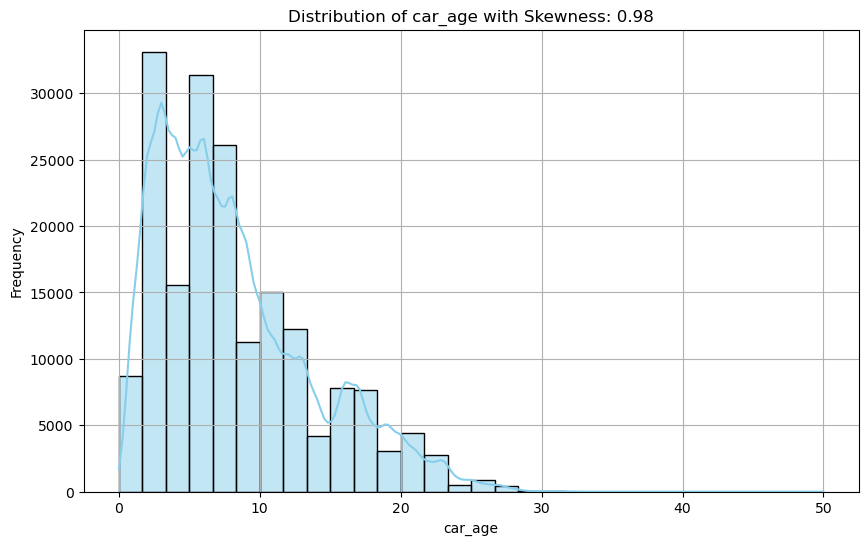

{'milage': 0.8889971944671571,
 'price': 20.305519730597997,
 'horsepower': 0.7921676479883495,
 'engine_size': 0.49101537132816875,
 'cylinders': 0.2518126798167639,
 'car_age': 0.9825494763722127}

In [1110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew

# Function to calculate skewness and plot distribution for numerical data
def plot_skewness(df, columns):
    skewness_results = {}
    
    for column in columns:
        # Calculate skewness
        skewness_value = skew(df[column].dropna())  # Drop NaN values to avoid errors
        skewness_results[column] = skewness_value
        
        # Plot distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {column} with Skewness: {skewness_value:.2f}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    return skewness_results
columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

plot_skewness(df,columns)
# Example usage with placeholder 'df' and 'numeric_columns'
# Assuming 'df' is your DataFrame and 'numeric_columns' is a list of your numerical columns
# skewness_dict = plot_skewness(df, numeric_columns)

# Display the skewness results to the user
# ace_tools.display_dataframe_to_user(name="Skewness Results", dataframe=pd.DataFrame(skewness_dict.items(), columns=['Column', 'Skewness']))



In [1111]:
df.describe()

,id,milage,price,horsepower,engine_size,cylinders,car_age
count,185146.000000,185146.000000,1.851460e+05,185146.000000,185146.000000,185146.000000,185146.000000
mean,94251.551489,65849.738282,4.374627e+04,344.702159,3.771188,6.350157,8.150551
std,54435.380774,49773.495491,7.820457e+04,113.882764,1.336693,1.551976,5.585302
min,0.000000,100.000000,2.000000e+03,70.000000,0.650000,3.000000,0.000000
25%,47112.250000,24300.000000,1.700000e+04,265.000000,3.000000,6.000000,4.000000
50%,94235.500000,57918.000000,3.059900e+04,329.437500,3.500000,6.000000,7.000000
75%,141405.750000,95450.000000,4.975000e+04,414.000000,4.700000,8.000000,11.000000
max,188532.000000,405000.000000,2.954083e+06,1020.000000,8.400000,12.000000,50.000000


In [1333]:
import numpy as np
from scipy import stats
import pandas as pd
#import ace_tools as tools


# Box-Cox transformation for price (which has high skewness)
 # Adding 1 to avoid zero values
df['price'] = np.log1p(df['price'])
df['car_age'] = np.log1p(df['car_age'])
df['milage'] = np.log1p(df['milage'])



In [1334]:
# Apply cube root transformation for milage


# Check skewness again


In [1335]:
columns = ['milage', 'price',"car_age"]



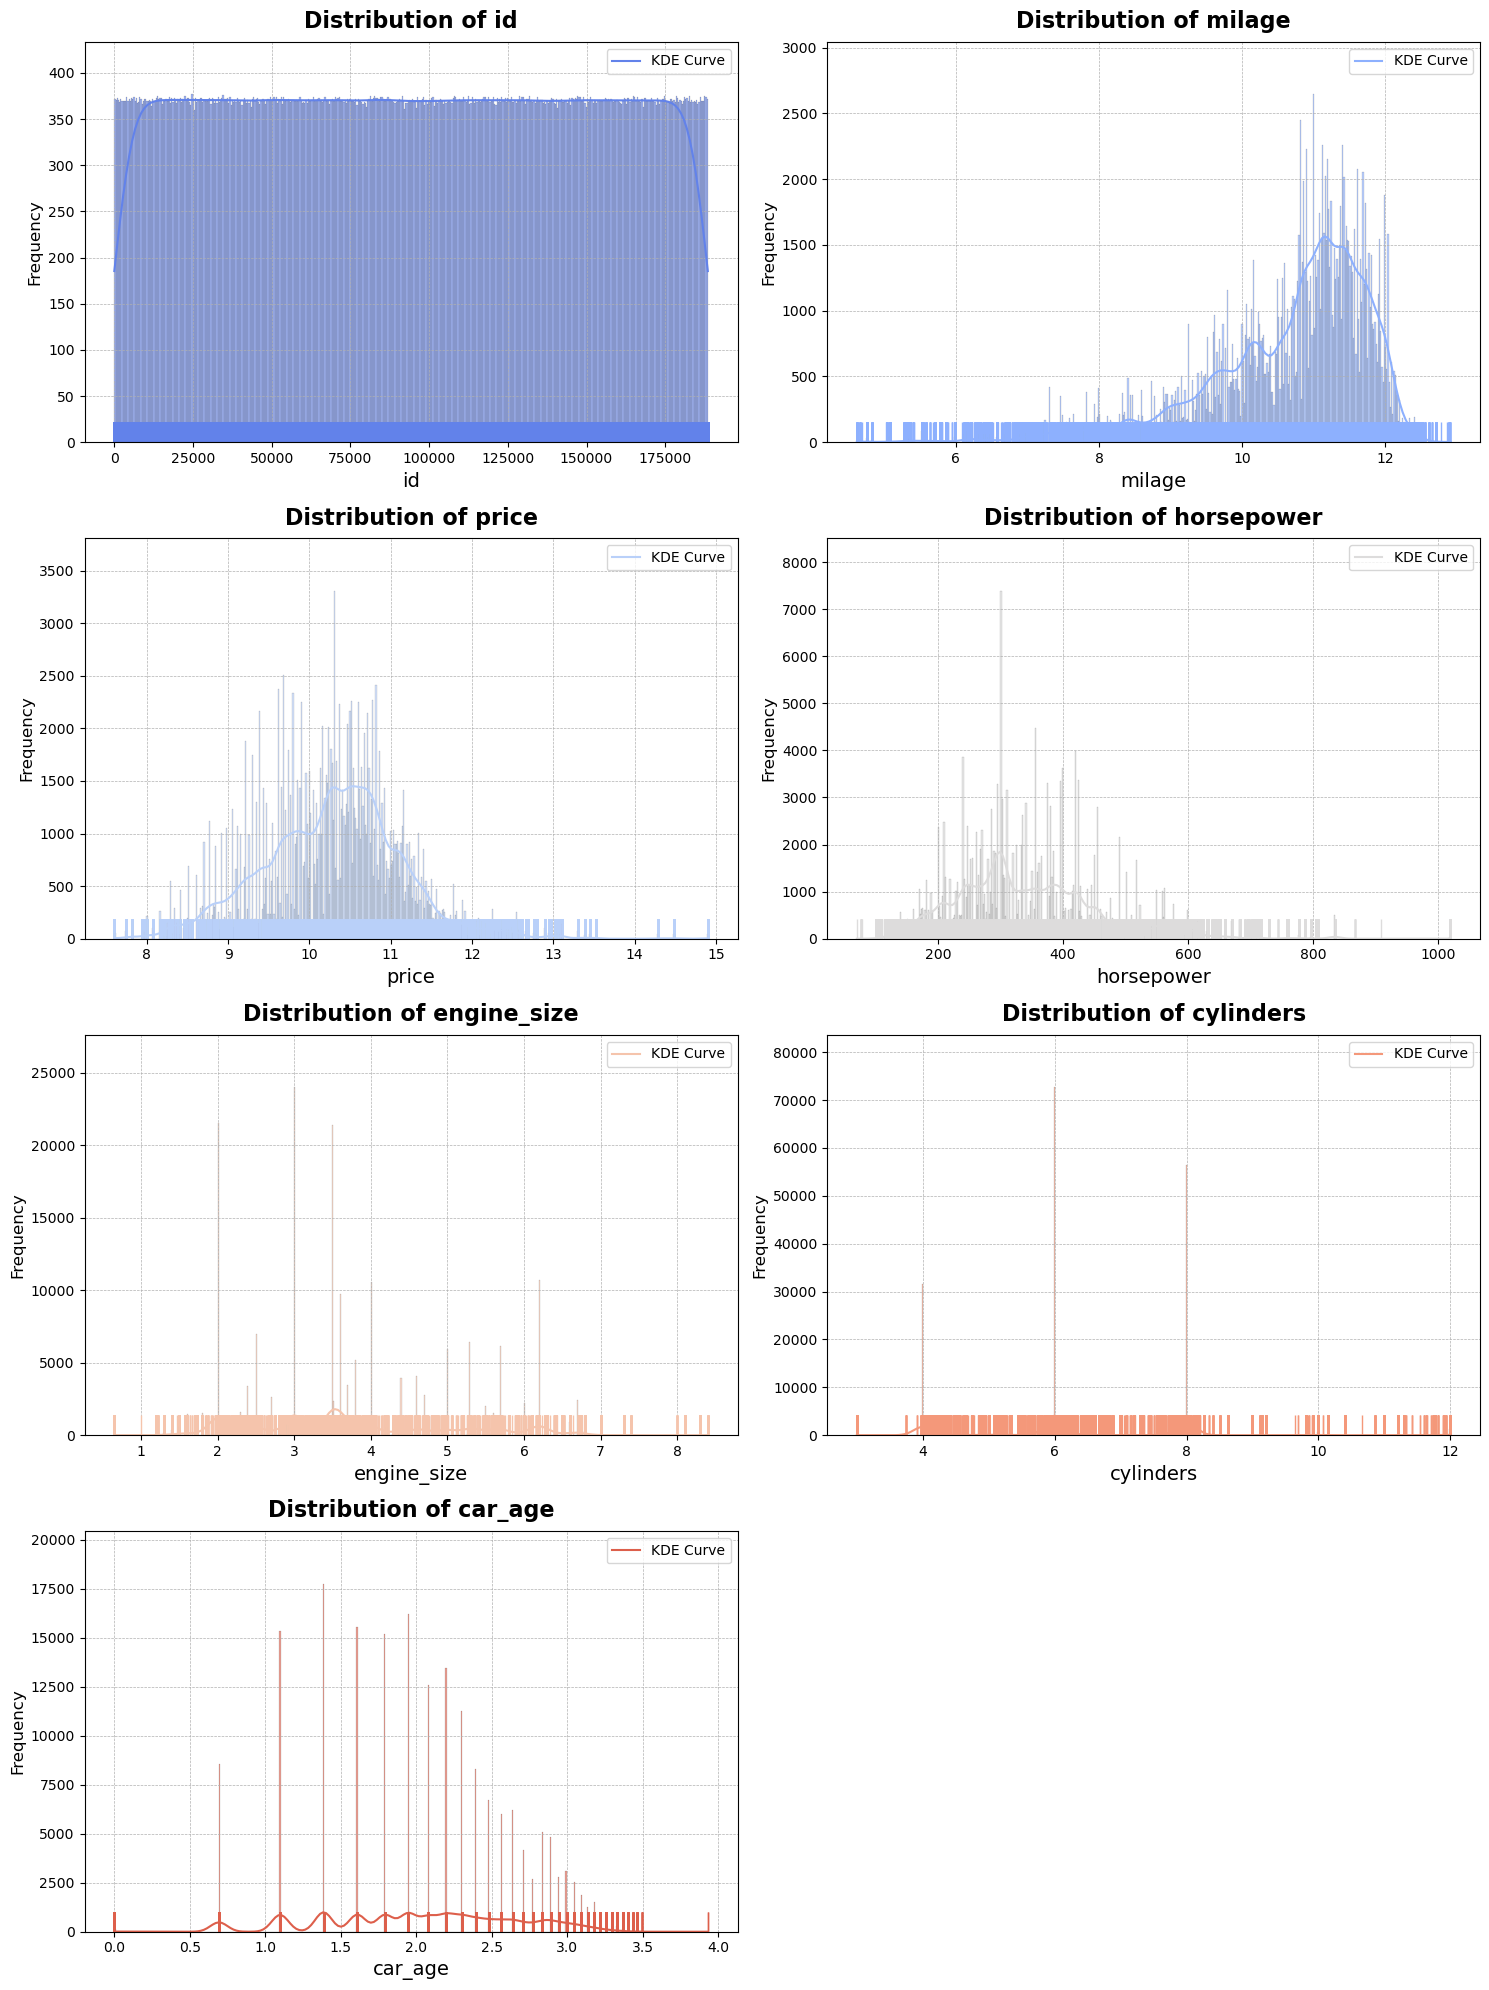

In [1336]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the grid size (2 histograms per row)
n_cols = 2
n_rows = (len(numerical_columns.columns) + 1) // n_cols

# Set the figure size
plt.figure(figsize=(15, n_rows * 5))

# Custom color palette
colors = sns.color_palette("coolwarm", len(numerical_columns.columns))

# Loop through each numerical column and create a customized histogram
for i, (column, color) in enumerate(zip(numerical_columns.columns, colors), 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create a histogram with KDE, transparency, and rug plot
    sns.histplot(df[column], kde=True, bins=500, color=color, alpha=0.6, edgecolor='black')
    sns.rugplot(x=df[column], color=color, height=0.05)  # Add rug plot to show data points
    
    # Adding title and labels
    plt.title(f'Distribution of {column}', fontsize=16, weight='bold', pad=10)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add gridlines for better visualization
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add legend for KDE curve
    plt.legend(["KDE Curve"])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [1115]:
df.shape

(185146, 15)

In [1116]:
df.head()

,id,brand,model,milage,fuel_type,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,car_age,Transmission_Standardized
0,0,MINI,Cooper S Base,12.269052,Gasoline,yellow,gray,None reported,Yes,8.343078,172.0,1.6,4.0,2.890372,Automatic
1,1,Lincoln,LS V8,11.872354,Gasoline,gray,brown,At least 1 accident or damage reported,Yes,8.517193,252.0,3.9,8.0,3.135494,Automatic
2,2,Chevrolet,Silverado 2500 LT,11.825778,Flex Fuel,blue,gray,None reported,Yes,9.539716,320.0,5.3,8.0,3.135494,Automatic
3,3,Genesis,G90 5.0 Ultimate,9.878221,Gasoline,black,black,None reported,Yes,10.714440,420.0,5.0,8.0,2.079442,Other
4,4,Mercedes-Benz,Metris Base,8.907748,Gasoline,black,brown,None reported,Yes,11.487618,208.0,2.0,4.0,1.386294,Automatic


In [1117]:
df_cleaned=df.drop("id",axis=1)

In [1118]:
df_cleaned.to_csv('final.csv', index=False)

In [1119]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to apply Label Encoding and One-Hot Encoding where appropriate
def encode_categorical_columns(df):
    categorical_columns = ['brand', 'model', 'fuel_type', 'accident',"ext_col","int_col", 'clean_title', 'Transmission_Standardized']
    
    # Label Encode 'brand' and 'model' due to high cardinality
    label_encoder = LabelEncoder()
    df['brand'] = label_encoder.fit_transform(df['brand'])
    df['model'] = label_encoder.fit_transform(df['model'])
    
    # One-Hot Encoding for the rest of the categorical columns
    low_cardinality_columns = ['fuel_type', 'accident' ,"ext_col","int_col",'clean_title', 'Transmission_Standardized']
    df = pd.get_dummies(df, columns=low_cardinality_columns, drop_first=True)
    
    return df

# Apply encoding
data_encoded = encode_categorical_columns(df)

# Check the first few rows of the encoded data
print(data_encoded.head())
data_encoded.head()

   id  brand  model     milage      price  horsepower  engine_size  cylinders  \
0   0     30    494  12.269052   8.343078       172.0          1.6        4.0   
1   1     27    929  11.872354   8.517193       252.0          3.9        8.0   
2   2      8   1574  11.825778   9.539716       320.0          5.3        8.0   
3   3     15    757   9.878221  10.714440       420.0          5.0        8.0   
4   4     35   1076   8.907748  11.487618       208.0          2.0        4.0   

    car_age  fuel_type_Electric  ...  int_col_green  int_col_orange  \
0  2.890372               False  ...          False           False   
1  3.135494               False  ...          False           False   
2  3.135494               False  ...          False           False   
3  2.079442               False  ...          False           False   
4  1.386294               False  ...          False           False   

   int_col_other  int_col_red  int_col_white  int_col_yellow  clean_title_Yes  \
0    

,id,brand,model,milage,price,horsepower,engine_size,cylinders,car_age,fuel_type_Electric,...,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_white,int_col_yellow,clean_title_Yes,Transmission_Standardized_CVT,Transmission_Standardized_Manual,Transmission_Standardized_Other
0,0,30,494,12.269052,8.343078,172.0,1.6,4.0,2.890372,False,...,False,False,False,False,False,False,True,False,False,False
1,1,27,929,11.872354,8.517193,252.0,3.9,8.0,3.135494,False,...,False,False,False,False,False,False,True,False,False,False
2,2,8,1574,11.825778,9.539716,320.0,5.3,8.0,3.135494,False,...,False,False,False,False,False,False,True,False,False,False
3,3,15,757,9.878221,10.714440,420.0,5.0,8.0,2.079442,False,...,False,False,False,False,False,False,True,False,False,True
4,4,35,1076,8.907748,11.487618,208.0,2.0,4.0,1.386294,False,...,False,False,False,False,False,False,True,False,False,False


In [1120]:
data_encoded.columns

Index(['id', 'brand', 'model', 'milage', 'price', 'horsepower', 'engine_size',
       'cylinders', 'car_age', 'fuel_type_Electric', 'fuel_type_Flex Fuel',
       'fuel_type_Gasoline', 'fuel_type_Hybrid', 'accident_None reported',
       'ext_col_blue', 'ext_col_brown', 'ext_col_gold', 'ext_col_gray',
       'ext_col_green', 'ext_col_orange', 'ext_col_other', 'ext_col_pink',
       'ext_col_purple', 'ext_col_red', 'ext_col_white', 'ext_col_yellow',
       'int_col_blue', 'int_col_brown', 'int_col_gold', 'int_col_gray',
       'int_col_green', 'int_col_orange', 'int_col_other', 'int_col_red',
       'int_col_white', 'int_col_yellow', 'clean_title_Yes',
       'Transmission_Standardized_CVT', 'Transmission_Standardized_Manual',
       'Transmission_Standardized_Other'],
      dtype='object')

In [1121]:
from sklearn.preprocessing import MinMaxScaler

# Function to apply Min-Max Scaling to specific columns
def normalize_columns_min_max(df, columns):
    # Initialize Min-Max Scaler
    scaler = MinMaxScaler()
    
    # Apply the scaler to the selected columns
    df[columns] = scaler.fit_transform(df[columns])
    
    return df

# Example usage: Specify the columns you want to normalize
columns_to_normalize = ['milage','horsepower','car_age','cylinders','engine_size']  # Replace with your specific columns
normalized_data = normalize_columns_min_max(data_encoded.copy(), columns_to_normalize)

# Check the first few rows of the normalized dataframe
normalized_data.head()


,id,brand,model,milage,price,horsepower,engine_size,cylinders,car_age,fuel_type_Electric,...,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_white,int_col_yellow,clean_title_Yes,Transmission_Standardized_CVT,Transmission_Standardized_Manual,Transmission_Standardized_Other
0,0,30,494,0.922547,8.343078,0.107368,0.122581,0.111111,0.735122,False,...,False,False,False,False,False,False,True,False,False,False
1,1,27,929,0.874732,8.517193,0.191579,0.419355,0.555556,0.797465,False,...,False,False,False,False,False,False,True,False,False,False
2,2,8,1574,0.869118,9.539716,0.263158,0.600000,0.555556,0.797465,False,...,False,False,False,False,False,False,True,False,False,False
3,3,15,757,0.634374,10.714440,0.368421,0.561290,0.555556,0.528874,False,...,False,False,False,False,False,False,True,False,False,True
4,4,35,1076,0.517401,11.487618,0.145263,0.174194,0.111111,0.352583,False,...,False,False,False,False,False,False,True,False,False,False


In [1122]:
normalized_data= normalized_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
normalized_data

,id,brand,model,milage,price,horsepower,engine_size,cylinders,car_age,fuel_type_Electric,...,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_white,int_col_yellow,clean_title_Yes,Transmission_Standardized_CVT,Transmission_Standardized_Manual,Transmission_Standardized_Other
0,0,30,494,0.922547,8.343078,0.107368,0.122581,0.111111,0.735122,0,...,0,0,0,0,0,0,1,0,0,0
1,1,27,929,0.874732,8.517193,0.191579,0.419355,0.555556,0.797465,0,...,0,0,0,0,0,0,1,0,0,0
2,2,8,1574,0.869118,9.539716,0.263158,0.600000,0.555556,0.797465,0,...,0,0,0,0,0,0,1,0,0,0
3,3,15,757,0.634374,10.714440,0.368421,0.561290,0.555556,0.528874,0,...,0,0,0,0,0,0,1,0,0,1
4,4,35,1076,0.517401,11.487618,0.145263,0.174194,0.111111,0.352583,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,7,603,0.745430,10.221978,0.368421,0.716129,0.555556,0.528874,0,...,0,0,0,0,0,0,1,0,0,1
188529,188529,35,205,0.680535,10.308986,0.331579,0.303226,0.333333,0.494913,0,...,0,0,0,0,0,0,1,0,0,0
188530,188530,35,222,0.591386,11.372525,0.420000,0.432258,0.555556,0.352583,0,...,0,0,0,0,0,0,1,0,0,0
188531,188531,3,1470,0.593530,11.349241,0.285316,0.303226,0.331804,0.279415,0,...,0,0,0,0,0,0,0,0,0,0


In [1123]:
!pip install lightgbm

In [1124]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def train_gbm(df, target_column, test_size=0.2, random_state=42, params=None, n_estimators=100, early_stopping_rounds=100):
    """
    Trains a Gradient Boosting Regressor (GBM) on the given DataFrame.

    Parameters:
    - df: The DataFrame containing features and the target variable.
    - target_column: The name of the target column (string).
    - test_size: Fraction of data to be used as the test set (default is 0.2).
    - random_state: Random state for reproducibility (default is 42).
    - params: GBM model parameters (dictionary). If None, default parameters are used.
    - n_estimators: Number of boosting stages (default is 100).
    - early_stopping_rounds: Early stopping rounds based on validation set. This is not natively supported in scikit-learn's GBM but can be manually implemented.

    Returns:
    - model: The trained GBM model.
    - rmse: Root Mean Squared Error on the test set.
    """
    
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Default parameters if none are provided
    if params is None:
        params = {
            'learning_rate': 0.01,
            'n_estimators': n_estimators,
            'max_depth': 10,
            'min_samples_split': 3,
            'min_samples_leaf': 1,
            'subsample': 1.0,
            'random_state': random_state
        }
    
    # Initialize the GBM regressor
    model = GradientBoostingRegressor(**params)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
  
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(np.expm1(y_pred), np.expm1(y_test)))
    
    print(f"RMSE on test set: {rmse}")
    
    return model, rmse,y_pred,y_test,X_train,y_train

# Example usage:
# Assuming 'df' is your DataFrame and 'price' is the target column
# model, rmse = train_gbm(df, target_column='price')


In [1125]:
target_column='price'

In [1126]:
model, rmse,y_pred,y_test,X_train,y_train= train_gbm(normalized_data, target_column)

RMSE on test set: 78080.18054097316


In [1127]:
from sklearn.metrics import r2_score

r3 = r2_score(y_test, y_pred)
r3

0.5686247749350846

In [1128]:
y_train_pred = model.predict(X_train)

In [1129]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.5954510750433364

In [1130]:

X = normalized_data.drop('price', axis=1)
y = normalized_data['price']

In [1131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [1132]:
# LightGBM parameters
lgb_params = {
    'objective': 'regression',
    'subsample': 0.95, 
    'reg_lambda': 0.005623413251903491, 
    'reg_alpha': 1.0, 
    'num_leaves': 570, 
    'n_estimators': 550, 
    'min_data_in_leaf': 135, 
    'min_child_weight': 0.02, 
    'max_depth': 13, 
    'learning_rate': 0.015, 
    'feature_fraction': 0.85, 
    'colsample_bytree': 0.9, 
    'cat_smooth': 50, 
    'bagging_freq': 9, 
    'bagging_fraction': 0.85
}

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(**lgb_params, random_state=42, verbose=-1)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
    
)

lgb_pred = lgb_model.predict(X_test)


rmse = np.sqrt(np.mean((np.expm1(lgb_pred) -  np.expm1(y_test))**2))

print(f'Optimized LightGBM RMSE: {rmse:.2f}')

Optimized LightGBM RMSE: 75714.66


In [1133]:
from sklearn.metrics import r2_score

r3 = r2_score(y_test, lgb_pred)
r3


0.666072484017509

In [1134]:
y_train_pred = lgb_model.predict(X_train)

In [1135]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.7015834367866426

In [1139]:
from sklearn.linear_model import LinearRegression

In [1141]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [1143]:
rmse = np.sqrt(np.mean((np.expm1(y_pred_lr) - np.expm1(y_test))**2))

print(f'Linear Regression RMSE: {rmse:.2f}')

Linear Regression RMSE: 77401.28


In [1144]:
r3 = r2_score(y_test, y_pred_lr)
r3


0.5849475570202971

In [1145]:
y_train_pred = model_lr.predict(X_train)

In [1146]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.5868701217247367

In [1149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [1151]:
!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/1c/e1/78e635a1e5f0066bd02a1ecfd658ad09fe30d275c65c2d0dd76fe253e648/catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.0/101.7 MB 262.6 kB/s eta 0:06:28
   ---------------------------------------- 0.

In [1152]:

from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor# Define a reduced parameter grid
param_dist = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'depth': [6, 8],
    'l2_leaf_reg': [3, 5],
    'bagging_temperature': [0.5, 0.8],
    'border_count': [32, 64]
}

catboost_random = RandomizedSearchCV(
    estimator=CatBoostRegressor(verbose=0, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of parameter settings sampled
    cv=3,  # Reduced cross-validation folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
catboost_random.fit(X_train, y_train)
best_params = catboost_random.best_params_
print("Best Parameters:", best_params)

# Predict on the test set
y_pred = catboost_random.predict(X_test)

# Evaluate the model
rmse = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_test))**2))

print(f'Optimized CatBoost RMSE: {rmse:.2f}')

Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 8, 'border_count': 64, 'bagging_temperature': 0.8}
Optimized CatBoost RMSE: 75756.66


In [1155]:
r3 = r2_score(y_test, y_pred)
r3
y_train_pred = catboost_random.predict(X_train)
r3

0.6630926090419066

In [1156]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.695882792748332

In [1158]:
# Define a reduced parameter grid
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
param_dist_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize the model
random_forest = RandomForestRegressor(random_state=42)

# Random search over the parameter grid with parallel processing
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist_rf,
    n_iter=10,  # Reduced number of iterations
    scoring='neg_mean_squared_error',
    cv=3,  # Consider reducing cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Predict on the test set
y_pred = random_search_rf.predict(X_test)

# Evaluate the model
rmse = np.sqrt(np.mean((np.expm1(y_pred) - np.expm1(y_test))**2))

print(f'Optimized Random Forest RMSE: {rmse:.2f}')

C:\Users\Tesla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tesla\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tesla\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Tesla\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Tesla\anaconda3\Lib\site-packages\sk

Best Parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Optimized Random Forest RMSE: 75838.10


In [1159]:
r3 = r2_score(y_test, y_pred)
r3
y_train_pred = random_search_rf.predict(X_train)
r3

0.6627994752951338

In [1160]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.7935681704863279